In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import sklearn as sk

sys.path.append('../../Classes')
from DataHandler import DataHandler
from NNModelTrainer import NNModelTrainer
from NNModelTester import NNModelTester

### Data + Model training + Tests

In [2]:
data = DataHandler(validation_sample= True, features_txt= 'all_features.txt', fields_list=['W02', 'W03', 'W04'], balance= 'weights')
data.main()

Members: 202787 (32.69%)
Non members: 417621 (67.31%)
----------------------------------------------------------------------
Training: 141951 members, 292334 non members
Validation: 42585 members, 87701 non members
Testing: 18251 members, 37586 non members
----------------------------------------------------------------------


In [3]:
layers_s_dropout = [
    tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ]

compile_params = dict(
        optimizer = tf.keras.optimizers.Adam(),
        loss = tf.keras.losses.BinaryCrossentropy(),
        metrics=[]   
    )

mod = NNModelTrainer(layers= layers_s_dropout, name= 'model_6', data= data, compile_params= compile_params)
# mod.train_model()
mod.load_model() # if model is already trained

In [4]:
test = NNModelTester(model= mod.model, data= data, name= 'model_6', history= mod.history)
test.predict()
test.curves()
test.write_report(extra_args= mod.args(), to_file = False)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 61)               123       
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                3968      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                      

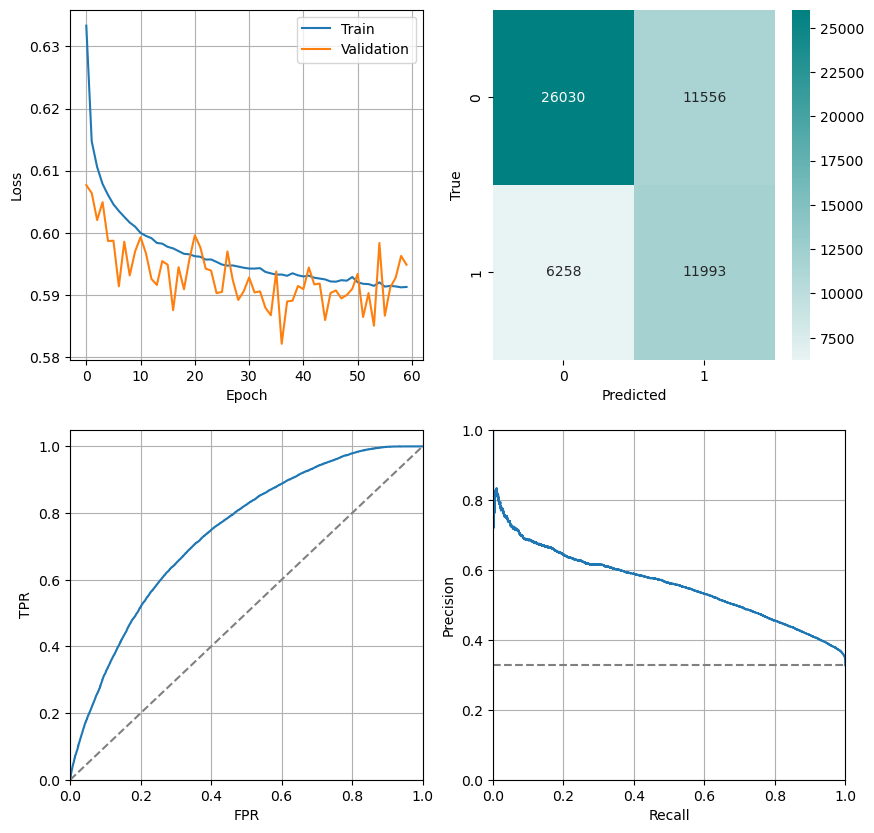

In [5]:
test.plot_report(to_file = False)

### Redshift distribution vs classification

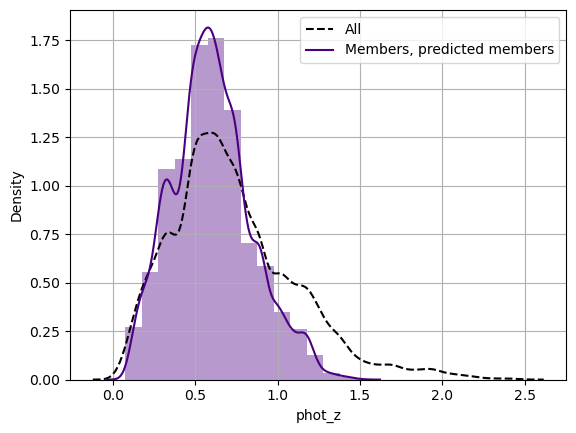

In [25]:
# true members, predicted as members
mm = data.testing[(data.testing['member'] == 1) & (data.testing['member'] == test.predictions.flatten())]
sns.histplot(data = mm, x = 'phot_z', binwidth=0.1, common_norm = True, stat = 'density', element = 'step', fill = True, alpha = 0.4, edgecolor = None, color = 'indigo')
sns.kdeplot(data = data.testing, x = 'phot_z', label = 'All', common_norm= True, color = 'black', linestyle = '--')
sns.kdeplot(data = mm, x = 'phot_z', label = 'Members, predicted members', common_norm= True, color = 'indigo')
plt.legend()
plt.grid()


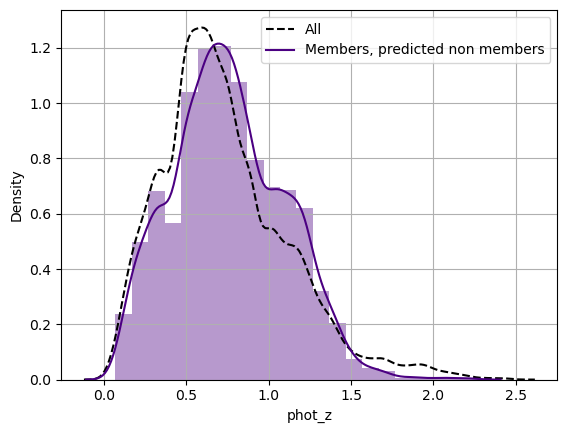

In [26]:
# true members, predicted as non members
mn = data.testing[(data.testing['member'] == 1) & (data.testing['member'] != test.predictions.flatten())]
sns.histplot(data = mn, x = 'phot_z', binwidth=0.1, common_norm = True, stat = 'density', element = 'step', fill = True, alpha = 0.4, edgecolor = None, color = 'indigo')
sns.kdeplot(data = data.testing, x = 'phot_z', label = 'All', common_norm= True, color = 'black', linestyle = '--')
sns.kdeplot(data = mn, x = 'phot_z', label = 'Members, predicted non members', common_norm= True, color = 'indigo')
plt.legend()
plt.grid()

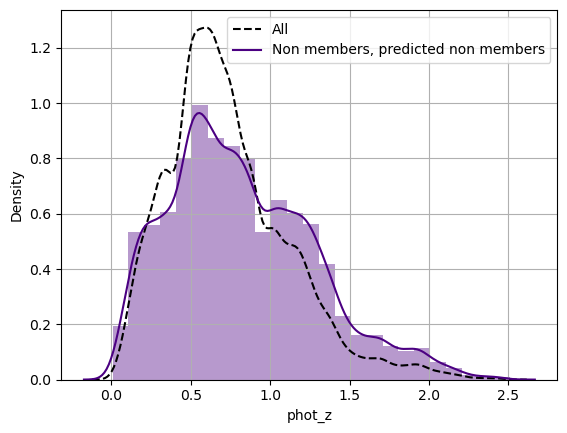

In [28]:
# true non members, predicted as non members
nn = data.testing[(data.testing['member'] == 0) & (data.testing['member'] == test.predictions.flatten())]
sns.histplot(data = nn, x = 'phot_z', binwidth=0.1, common_norm = True, stat = 'density', element = 'step', fill = True, alpha = 0.4, edgecolor = None, color = 'indigo')
sns.kdeplot(data = data.testing, x = 'phot_z', label = 'All', common_norm= True, color = 'black', linestyle = '--')
sns.kdeplot(data = nn, x = 'phot_z', label = 'Non members, predicted non members', common_norm= True, color = 'indigo')
plt.legend()
plt.grid()


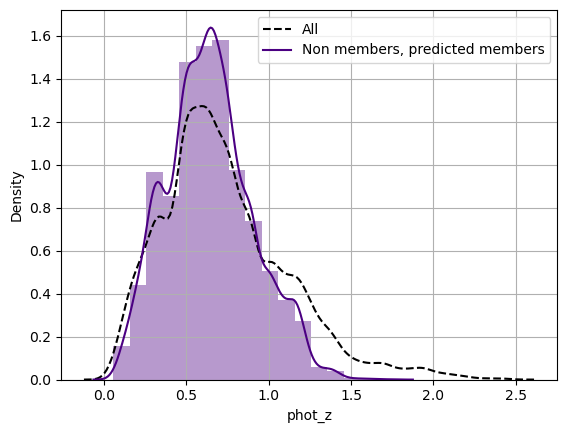

In [31]:
# true non members, predicted as members
nm = data.testing[(data.testing['member'] == 0) & (data.testing['member'] != test.predictions.flatten())]
sns.histplot(data = nm, x = 'phot_z', binwidth=0.1, common_norm = True, stat = 'density', element = 'step', fill = True, alpha = 0.4, edgecolor = None, color = 'indigo')
sns.kdeplot(data = data.testing, x = 'phot_z', label = 'All', common_norm= True, color = 'black', linestyle = '--')
sns.kdeplot(data = nm, x = 'phot_z', label = 'Non members, predicted members', common_norm= True, color = 'indigo')
plt.legend()
plt.grid()


### Fraction of correct/incorrect classification vs redshift

In [61]:
# true members, predicted as members
mm = data.testing[(data.testing['member'] == 1) & (data.testing['member'] == test.predictions.flatten())]
# true members, predicted as non members
mn = data.testing[(data.testing['member'] == 1) & (data.testing['member'] != test.predictions.flatten())]
# members
m = data.testing[(data.testing['member'] == 1)]

# true non members, predicted as non members
nn = data.testing[(data.testing['member'] == 0) & (data.testing['member'] == test.predictions.flatten())]
# true non members, predicted as members
nm = data.testing[(data.testing['member'] == 0) & (data.testing['member'] != test.predictions.flatten())]
# non members
n = data.testing[(data.testing['member'] == 0)]

In [86]:
# divide in bins of redshift, and get the fraction of members correctly and incorrectly classifies in each bin
corr_mem = []
incorr_mem = []
mem = []
corr_non = []
incorr_non = []
non = []

z_lims = np.linspace(0.0,1.8,10)
step = 0.2

df_list = [mm,mn,m,nn,nm,n]
count_list = [corr_mem, incorr_mem, mem, corr_non, incorr_non, non]

for i in z_lims:
    for df,count in zip(df_list, count_list):
        zbin = df[(df.phot_z >= i) & (df.phot_z < i+step)]
        count.append(zbin.shape[0] )

corr_mem = np.array(corr_mem)
incorr_mem = np.array(incorr_mem)
mem = np.array(mem)
corr_non = np.array(corr_non)
incorr_non = np.array(incorr_non)
non = np.array(non)

names = [f'[{i :.1f};{i+step :.1f}]' for  i in z_lims]


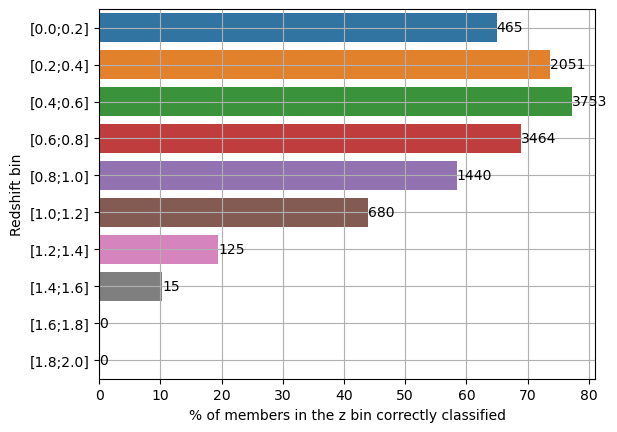

In [87]:
ax = sns.barplot(x = corr_mem/mem * 100, y = names, orient= 'h')
plt.xlabel('% of members in the z bin correctly classified')
plt.ylabel('Redshift bin')
plt.grid()
ax.bar_label(ax.containers[0], labels=corr_mem)
plt.show()

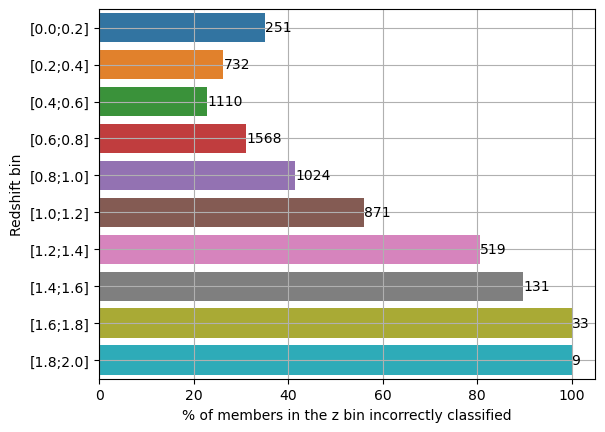

In [88]:
ax = sns.barplot(x = incorr_mem/mem*100, y = names, orient= 'h')
plt.xlabel('% of members in the z bin incorrectly classified')
plt.ylabel('Redshift bin')
plt.grid()
ax.bar_label(ax.containers[0], labels=incorr_mem)
plt.show()


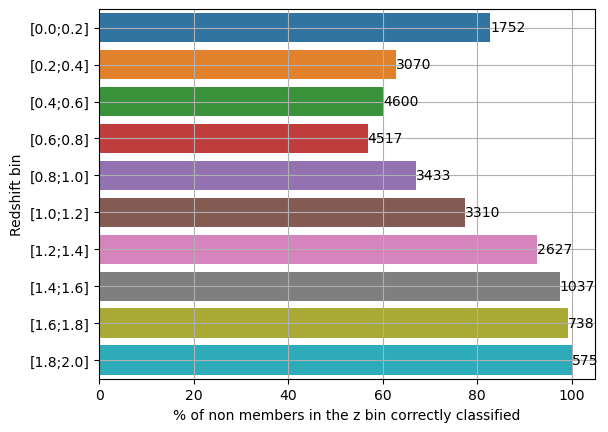

In [89]:
ax = sns.barplot(x = corr_non/non*100, y = names, orient= 'h')
plt.xlabel('% of non members in the z bin correctly classified')
plt.ylabel('Redshift bin')
plt.grid()
ax.bar_label(ax.containers[0], labels=corr_non)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

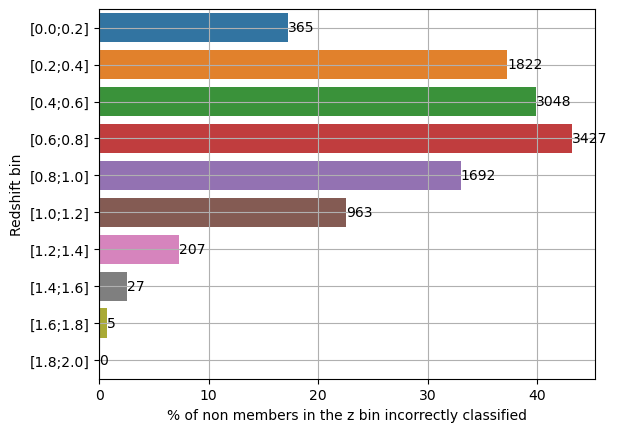

In [90]:
ax = sns.barplot(x = incorr_non/non*100, y = names, orient= 'h')
plt.xlabel('% of non members in the z bin incorrectly classified')
plt.ylabel('Redshift bin')
plt.grid()
ax.bar_label(ax.containers[0], labels=incorr_non)
plt.show

### Metrics vs redshift

In [6]:
min_ = 0.
max_ = 2.
step = 0.2
n_bins = int((max_ - min_)/step)
z_centers = np.linspace(min_ + step/2., max_ - step/2., n_bins)
z_lims = np.linspace(min_, max_, n_bins + 1)

print(z_centers)
print(z_lims)

[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9]
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]


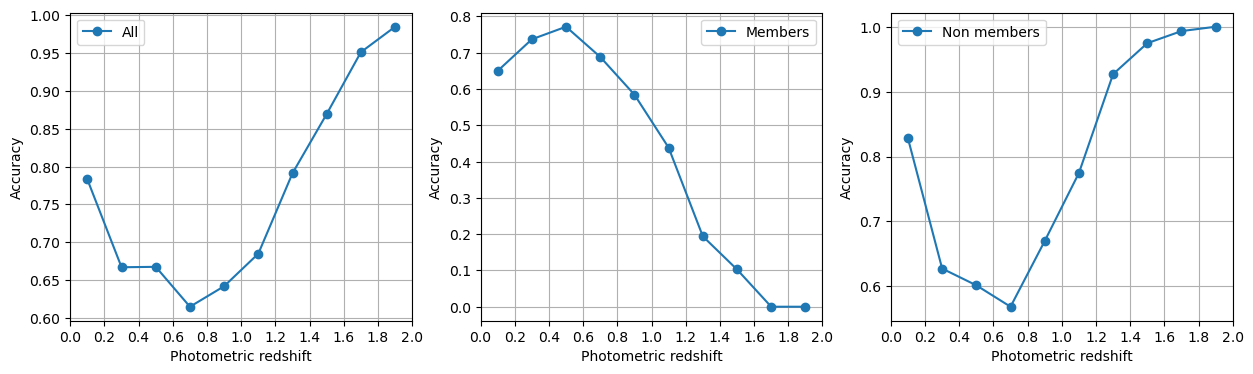

In [48]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
metric = sk.metrics.accuracy_score
met, met_mem, met_non = ([] for i in range(3))
for z in z_centers:
    cond = (data.testing['phot_z'] > z - step/2.) & (data.testing['phot_z'] <= z + step/2.)
    met.append(metric(y_true= data.testing_labels()[cond], y_pred= test.predictions[cond]))

    cond = (data.testing['phot_z'] > z - step/2.) & (data.testing['phot_z'] <= z + step/2.) & (data.testing['member'] == 1)
    met_mem.append(metric(y_true= data.testing_labels()[cond], y_pred= test.predictions[cond]))

    cond = (data.testing['phot_z'] > z - step/2.) & (data.testing['phot_z'] <= z + step/2.) & (data.testing['member'] == 0)
    met_non.append(metric(y_true= data.testing_labels()[cond], y_pred= test.predictions[cond]))

plt.figure(figsize=(15,4))
labels = ['All', 'Members', 'Non members']
for i,(a,l) in enumerate(zip([met, met_mem, met_non], labels)):
    plt.subplot(1,3,i+1)
    plt.plot(z_centers, a, label = l, marker = 'o')
    plt.grid()
    plt.legend()
    plt.xlabel('Photometric redshift')
    plt.ylabel('Accuracy')
    plt.xticks(z_lims)
plt.show()

c:\Users\Gimena\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


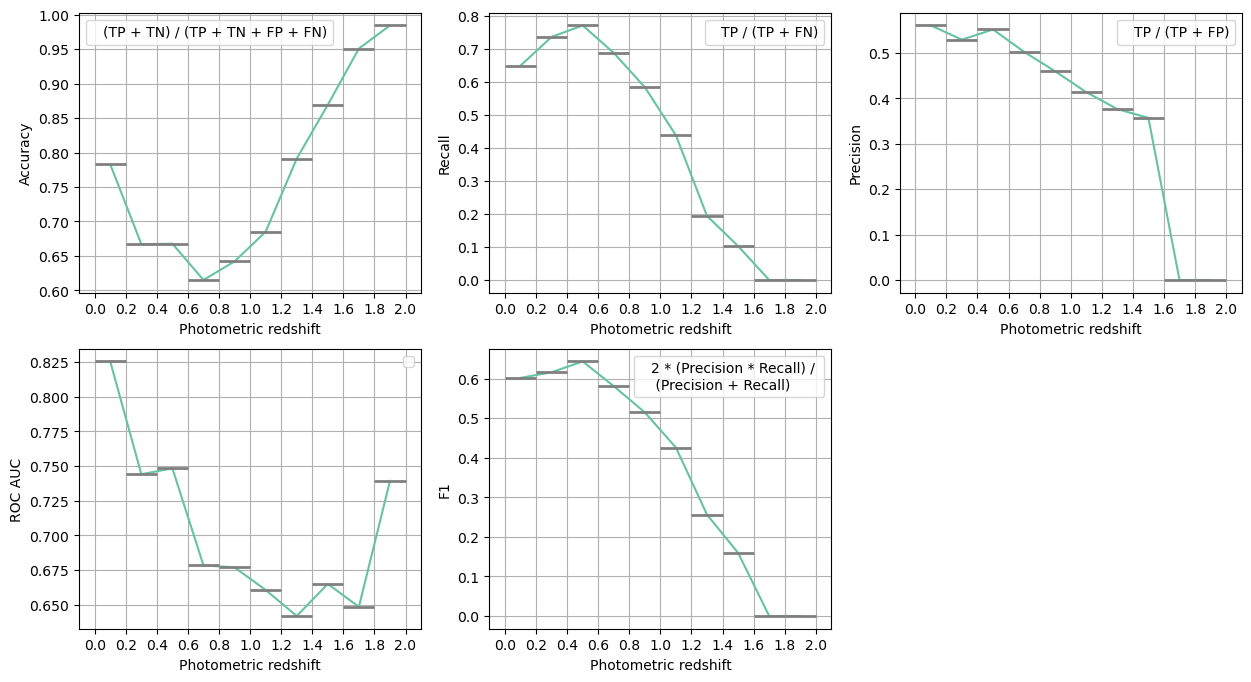

In [18]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
metrics = [sk.metrics.accuracy_score, sk.metrics.recall_score, sk.metrics.precision_score, sk.metrics.roc_auc_score, sk.metrics.f1_score]
names = ['Accuracy', 'Recall', 'Precision', 'ROC AUC', 'F1']
defs = [
    '(TP + TN) / (TP + TN + FP + FN)',
    'TP / (TP + FN)',
    'TP / (TP + FP)',
    '',
    '2 * (Precision * Recall) / \n (Precision + Recall)'
]

plt.figure(figsize=(15,8))
z_metrics = [[] for i in metrics]

for i,(met,zmet,nam,d) in enumerate(zip(metrics, z_metrics, names, defs)):
    for z in z_centers:
        cond = (data.testing['phot_z'] > z - step/2) & (data.testing['phot_z'] <= z + step/2)
        if nam == 'ROC AUC':
            zmet.append(met(y_true= data.testing_labels()[cond], y_score= test.scores[cond]))
        else:
            zmet.append(met(y_true= data.testing_labels()[cond], y_pred= test.predictions[cond]))

    plt.subplot(2,3,i+1)
    plt.plot(z_centers, zmet, label = d)
    plt.grid()
    plt.xlabel('Photometric redshift')
    plt.ylabel(nam)
    plt.legend(markerscale=0, handlelength=0)
    plt.xticks(z_lims)

    for i, z in enumerate(z_centers):
        plt.hlines(zmet[i], z - step/2, z + step/2, color='grey', linewidth=2)
plt.show()

In [10]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
metrics = [sk.metrics.recall_score, sk.metrics.precision_score, sk.metrics.roc_auc_score]
names = ['Recall (Completitud)', 'Precision (Pureza)', 'ROC AUC']
defs = [
    'TP / (TP + FN)',
    'TP / (TP + FP)',
    ''
]

plt.figure(figsize=(7.5,2.3), dpi = 500)
pal = sns.color_palette("Set2")
sns.set_palette(pal, color_codes=True)
z_metrics = [[] for i in metrics]

for i,(met,zmet,nam,d) in enumerate(zip(metrics, z_metrics, names, defs)):
    for z in z_centers:
        cond = (data.testing['phot_z'] > z - step/2) & (data.testing['phot_z'] <= z + step/2)
        if nam == 'ROC AUC':
            zmet.append(met(y_true= data.testing_labels()[cond], y_score= test.scores[cond]))
        else:
            zmet.append(met(y_true= data.testing_labels()[cond], y_pred= test.predictions[cond]))

    plt.subplot(1,3,i+1, facecolor = (1, 1, 1, 0.6))
    plt.plot(z_centers, zmet, label = d, lw=4, c = 'black')
    plt.grid(ls = '--', alpha=0.25, c = 'black')
    plt.xlabel('Redshift fotométrico')
    plt.ylabel(nam)
    if d:
        legend = plt.legend(edgecolor=(0, 0, 0, 1.), markerscale=0, handlelength=0)
        legend.get_frame().set_alpha(None)
        legend.get_frame().set_facecolor((1, 1, 1, 0))
    plt.xticks([0.4,0.8,1.2,1.6])
    # plt.axes(frame_on=False)
    sns.despine(left=True, bottom=True, right=True)

    # for i, z in enumerate(z_centers):
    #     plt.hlines(zmet[i], z - step/2, z + step/2, color='grey', linewidth=2)
plt.tight_layout()
plt.savefig('demo.png', facecolor=(1,1,1,0))
plt.close()


c:\Users\Gimena\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
